In [4]:
import pandas as pd
import glob
import os
import lmdb
import pickle
import ast
# from datasets import load_dataset
from tqdm import tqdm
import numpy as np
from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df_meta = pd.read_csv('/mnt/nas/Datasets/than/CT/ct_rate_meta_reports/train_metadata.csv')
df_train = pd.read_csv('/home/than/DeepLearning/CMIL/csvs/ct_rate_train.csv')
# df_meta['NumberofSlices'].plot.hist(bins=100)
# df_meta['NumberofSlices'].mean()
df_512 = df_meta[(df_meta['Rows'] >= 512) & (df_meta['Columns'] >= 512)]
df_512 = df_512[df_512['VolumeName'].isin(df_train['VolumeName'])]
df_512 = df_512.merge(df_train, on='VolumeName', how='left')
df_512['xy_spacing'] = df_512['XYSpacing'].apply(lambda x: ast.literal_eval(x)[0])
df_512['Path'] = df_512['Path'].apply(lambda x: x.replace('/mnt/nas/Datasets/than/CT/', '/mnt/nas/CT/'))
len(df_512)
df_512.head()
df_512['ZSpacing'].value_counts()
df_512['xy_spacing'].mean()
df_512['NumberofSlices'].mean()
df_512.to_csv('/home/than/DeepLearning/CMIL/csvs/ct_rate_train_all.csv', index=False)

47149

,VolumeName,Manufacturer,SeriesDescription,ManufacturerModelName,PatientSex,PatientAge,ReconstructionDiameter,DistanceSourceToDetector,DistanceSourceToPatient,GantryDetectorTilt,...,Lung opacity,Pulmonary fibrotic sequela,Pleural effusion,Mosaic attenuation pattern,Peribronchial thickening,Consolidation,Bronchiectasis,Interlobular septal thickening,Path,xy_spacing
0,train_1_a_1.nii.gz,Siemens Healthineers,"Thorax 1,50 Br40 S3",SOMATOM go.All,NaN,049Y,420.303754,983.0,535.0,0,...,1,0,0,0,1,1,0,0,/mnt/nas/Datasets/than/CT/ct_rate_volumes/data...,0.820906
1,train_1_a_2.nii.gz,Siemens Healthineers,"Thorax 1,50 Br60 S3",SOMATOM go.All,NaN,049Y,420.303754,983.0,535.0,0,...,1,0,0,0,1,1,0,0,/mnt/nas/Datasets/than/CT/ct_rate_volumes/data...,0.820906
2,train_2_a_1.nii.gz,Siemens Healthineers,"Thorax 1,50 Br40 S3",SOMATOM go.All,M,045Y,365.000000,983.0,535.0,0,...,0,0,0,0,1,0,0,0,/mnt/nas/Datasets/than/CT/ct_rate_volumes/data...,0.712891
3,train_2_a_2.nii.gz,Siemens Healthineers,"Thorax 1,50 Br60 S3",SOMATOM go.All,M,045Y,365.000000,983.0,535.0,0,...,0,0,0,0,1,0,0,0,/mnt/nas/Datasets/than/CT/ct_rate_volumes/data...,0.712891
4,train_3_a_1.nii.gz,Siemens Healthineers,"Thorax 1,50 Bl56 S3",SOMATOM go.All,M,073Y,389.651856,983.0,535.0,0,...,1,1,0,0,1,0,1,0,/mnt/nas/Datasets/than/CT/ct_rate_volumes/data...,0.761039


ZSpacing
1.5000    18572
0.7500    11819
1.0000     8909
1.2500     5371
3.0000     1234
          ...  
3.1309        1
0.4804        1
0.4839        1
0.8165        1
0.6214        1
Name: count, Length: 64, dtype: int64

0.6049450576037125

303.5474135188445

In [4]:
len(df_512.drop_duplicates())

47149

In [2]:
ds = load_dataset("ibrahimhamamci/CT-RATE", "labels")
downloaded_files = glob.glob('/mnt/nas/Datasets/than/CT/ct_rate_volumes/dataset/train/train_*/train_*_*/*.nii.gz')

In [3]:
df_train = pd.DataFrame(ds['train'])
df_test = pd.DataFrame(ds['validation'])

files = [os.path.basename(f) for f in downloaded_files]
df_download = pd.DataFrame(data={'VolumeName': files,
                                 'Path': downloaded_files})
df_train = df_train.merge(df_download, on='VolumeName', how='left')
len(df_train)
df_train.head()

47149

,VolumeName,Medical material,Arterial wall calcification,Cardiomegaly,Pericardial effusion,Coronary artery wall calcification,Hiatal hernia,Lymphadenopathy,Emphysema,Atelectasis,Lung nodule,Lung opacity,Pulmonary fibrotic sequela,Pleural effusion,Mosaic attenuation pattern,Peribronchial thickening,Consolidation,Bronchiectasis,Interlobular septal thickening,Path
0,train_1_a_1.nii.gz,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,/mnt/nas/Datasets/than/CT/ct_rate_volumes/data...
1,train_1_a_2.nii.gz,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,/mnt/nas/Datasets/than/CT/ct_rate_volumes/data...
2,train_2_a_1.nii.gz,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,/mnt/nas/Datasets/than/CT/ct_rate_volumes/data...
3,train_2_a_2.nii.gz,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,/mnt/nas/Datasets/than/CT/ct_rate_volumes/data...
4,train_3_a_1.nii.gz,0,1,1,0,1,0,1,0,0,1,1,1,0,0,1,0,1,0,/mnt/nas/Datasets/than/CT/ct_rate_volumes/data...


In [13]:
train_loader, val_loader = get_data_loaders(csv_path='csvs/ct_rate_train.csv', batch_size=1, num_workers=0)

In [14]:
for i, (img, label) in enumerate(train_loader):
    print(img.shape, label)
    if i == 5:
        break

RuntimeError: applying transform <monai.transforms.utility.dictionary.EnsureChannelFirstd object at 0x7fdd1f621bd0>

In [2]:
class LMDBDataset(Dataset):
    def __init__(self, lmdb_path, keys, transforms=None):
        self.lmdb_path = lmdb_path
        self.keys = keys  # List of image names (keys in LMDB)
        self.transforms = transforms
        self.env = None  # LMDB environment will be initialized in __getitem__

    def __len__(self):
        return len(self.keys)

    def __getitem__(self, idx):
        if self.env is None:
            # Initialize LMDB environment per worker
            self.env = lmdb.open(self.lmdb_path, readonly=True, lock=False, readahead=False)

        key = self.keys[idx]
        with self.env.begin(write=False) as txn:
            value = txn.get(key.encode('ascii'))
            shape_value = txn.get(f"{key}_shape".encode('ascii'))
            if value is None or shape_value is None:
                raise KeyError(f"Key {key} not found in LMDB database.")

            # Reconstruct the shape
            img_shape = np.frombuffer(shape_value, dtype=np.int32)

            # Reconstruct the NumPy array from raw bytes
            data = np.frombuffer(value, dtype=np.uint8)
            data = data.reshape(img_shape)

            # Make the array writable by creating a copy
            data = data.copy()

        # Wrap the data in a dictionary for MONAI transforms
        data_dict = np.expand_dims(data, axis=0)

        # Apply transforms if any
        if self.transforms:
            data_dict = self.transforms(data_dict)

        return data_dict

    def __getstate__(self):
        # Exclude the LMDB environment from being pickled
        state = self.__dict__.copy()
        state['env'] = None
        return state

    def __setstate__(self, state):
        self.__dict__.update(state)
        self.env = None

    def __del__(self):
        # Close the LMDB environment when the dataset is destroyed
        if self.env is not None:
            self.env.close()

In [10]:
df = pd.read_csv('csvs/ct_rate_train.csv')
keys = df['VolumeName'].tolist()
df.head()
row = df.iloc[0]
label = []
for col in df.columns[1:-1]:
    label.append(row[col].astype(np.int32))
label = np.array(label)
label

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

In [47]:
import torchio as tio

transforms = tio.Compose([
    tio.RescaleIntensity(out_min_max=(-1, 1)),
    tio.RandomAffine(scales=(0.9, 1.1), degrees=10),
    tio.CropOrPad((312, 416, 416)),
])

In [15]:
from torch.utils.data import DataLoader
from dataset import LMDB_Dataset
import pandas as pd
from transforms import RandomResizedCrop3D, ZScoreNormalizationPerSample
import torchvision.transforms as transforms

dataset = LMDB_Dataset(csv_path='/home/than/DeepLearning/CMIL/csvs/ct_rate_train_512.csv',
    lmdb_path='/home/than/Datasets/CT/ct_rate_train_512.lmdb', 
    transforms=transforms.Compose([
        RandomResizedCrop3D(size=(128, 224, 224)),
        ZScoreNormalizationPerSample()])
    )

data_loader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=True,
    num_workers=4,
    pin_memory=True,
)

for batch in data_loader:
    img, label = batch
    print(img.shape)
    break
    # _ = plt.imshow(batch[0, 0, 10, :, :].cpu().numpy(), cmap='gray')
    # _ = plt.show()
    # break

torch.Size([4, 1, 128, 224, 224])


torch.Size([4, 1, 128, 224, 224])

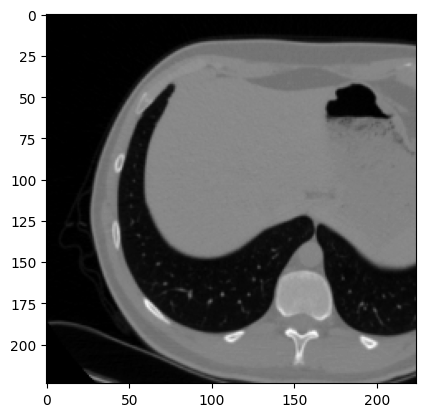

In [24]:
img.shape
_ = plt.imshow(img[2, 0, 40, :, :].cpu().numpy(), cmap='gray')

(384, 512, 512)

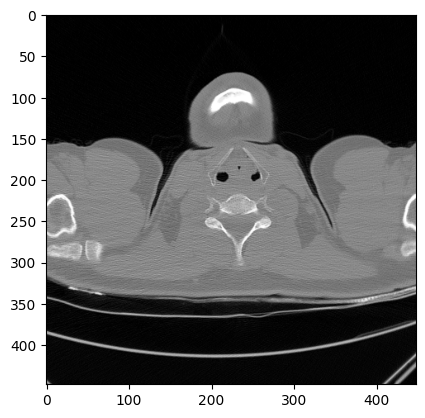

In [9]:
npz_file = '/hpcwork/p0021834/workspace_tianyu/ct_rate/valid_1_a_1.npz'
data = np.load(npz_file)
data['img_data'].shape
data = data['img_data']
_ = plt.imshow(data[-4, 32:-32, 32:-32], cmap='gray')